# <center>Portuguese Bank Marketing Analytics

# Table of Contents
1. **[Project Background](#1)**
2. **[Load the data and Examine the data](#2)**
3. **[Data Cleaning](#3)**
4. **[Exploratory Data Analysis](#4)**
5. **[Data Visualization](#5)**
6. **[Machine Learning: Classification](#6)**
7. **[Conclusion & Recommendations](#7)**

### 1. Project Background

Portuguese bank lost their revenue, and they wanted to investigate why their revenue declined. So, they can take necessary steps to solve bank problems. After deep analysis, they discovered that the main reason is that their clients are not depositing as frequently as before. Expressive to term deposits allow banks to hold onto a deposit for certain amount of time, so banks can invest in higher gain financial products to make a profit. Furthermore, banks also hold better chance to encourage term deposit clients into buying other products such as funds or insurance to further increase their revenues. Consequently, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

###### This Jupyter Notebook loads, explores, and visualizes the Bank Marketing datasets. Also, builds and tests several predictive models, and then predict if client will subscribe a term deposit on test data using the best model.

In [1]:
# Current workspace
!pwd

/Users/bravali/Downloads/Bank-Marketing-Campaign-for-Term-Deposit-master/Bank-Marketing-Client-Subscription-


In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.utils import shuffle

%matplotlib inline

###  2. Load the data and Examine the data

In [3]:
#Load csv file to pd dataframe
bank_data = pd.read_csv("bank-additional-full.csv",sep=';')

#### <font color=green>*Examine the data*</font>

In [4]:
# Columns information
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
#change column names
bank_data.rename(columns={'default': 'has_credit','housing':'housing_loan','loan':'personal_loan','y':'subscribed'}, inplace=True)
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'has_credit', 'housing_loan',
       'personal_loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'subscribed'],
      dtype='object')

In [6]:
# print first five rows of bank_data
bank_data.head(10)

,age,job,marital,education,has_credit,housing_loan,personal_loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# display total number of rows and columns
bank_data.shape

(41188, 21)

In [8]:
# know bak_data information 
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
has_credit        41188 non-null object
housing_loan      41188 non-null object
personal_loan     41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
subscribed        41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [9]:
# Describe numeric bank_data
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
# check the occurrence of each job in bank_data
bank_data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

### 3. Data Cleaning

<img src='https://www.officedepot.com/resource/blob/60908/0f84e67038ac7cd8966cacaaab7f92fb/know-what--and-when--to-purge-data.gif' width='500'>

#### *Check for Duplicates*

In [11]:
bank_data.duplicated().sum()

12

#### <font color=green>*Check invalid or corrupt data and remove it*</font>

In [12]:
'''remove duplicated rows'''
def clean_data(data):
    clean_data = data.drop_duplicates()
    return clean_data

In [13]:
clean_bank_data = clean_data(bank_data)
clean_bank_data.shape

(41176, 21)

In [14]:
clean_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
has_credit        41176 non-null object
housing_loan      41176 non-null object
personal_loan     41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null object
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
subscribed        41176 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### 4. Exploratory Data Analysis

<img src='http://piesiecreativity.com/wp-content/uploads/2018/02/Online-online.gif' width='500'>

In [15]:
'''Divide varibles in categorical and numerical'''
categorical_vars = [col for col in clean_bank_data.columns if (clean_bank_data[col].dtype == 'object') & (col != 'subscribed')]
numeric_vars = ['age', 'duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
target_var = ['subscribed']

In [16]:
# seperate feature and traget variables
X = clean_bank_data.iloc[:,:-1]
y = clean_bank_data.iloc[:,-1]
X_list = list(X.columns)
X_list

['age',
 'job',
 'marital',
 'education',
 'has_credit',
 'housing_loan',
 'personal_loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [17]:
# know target variable data
y.value_counts()

no     36537
yes     4639
Name: subscribed, dtype: int64

In [18]:
X['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

#### *Summarize numeric variable*

In [19]:
X.describe(include=[np.number])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### *summarize categorical variable*

In [20]:
X.describe(include = ['O'])

,job,marital,education,has_credit,housing_loan,personal_loan,contact,month,day_of_week,poutcome
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551


#### *Find Correction of variables*

In [21]:
def get_correlation(data):
    return data.corr()

corr_data = get_correlation(X)
corr_data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


### 5. Data Visualization

<img src='https://media0.giphy.com/media/3oKIPEqDGUULpEU0aQ/giphy.gif' width='500'>

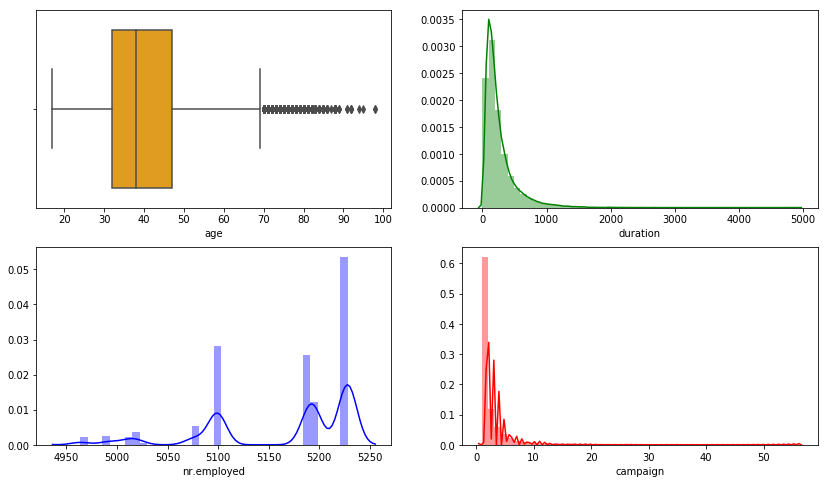

In [22]:
plt.figure(figsize = (14, 8))
plt.subplot(2,2,1)
sns.boxplot(X.age, color='Orange')
plt.subplot(2,2,2)
sns.distplot(X.duration, color='green')
plt.subplot(2,2,3)
sns.distplot(X['nr.employed'], color='blue')
plt.subplot(2,2,4)
sns.distplot(X.campaign, color='red')
plt.show()

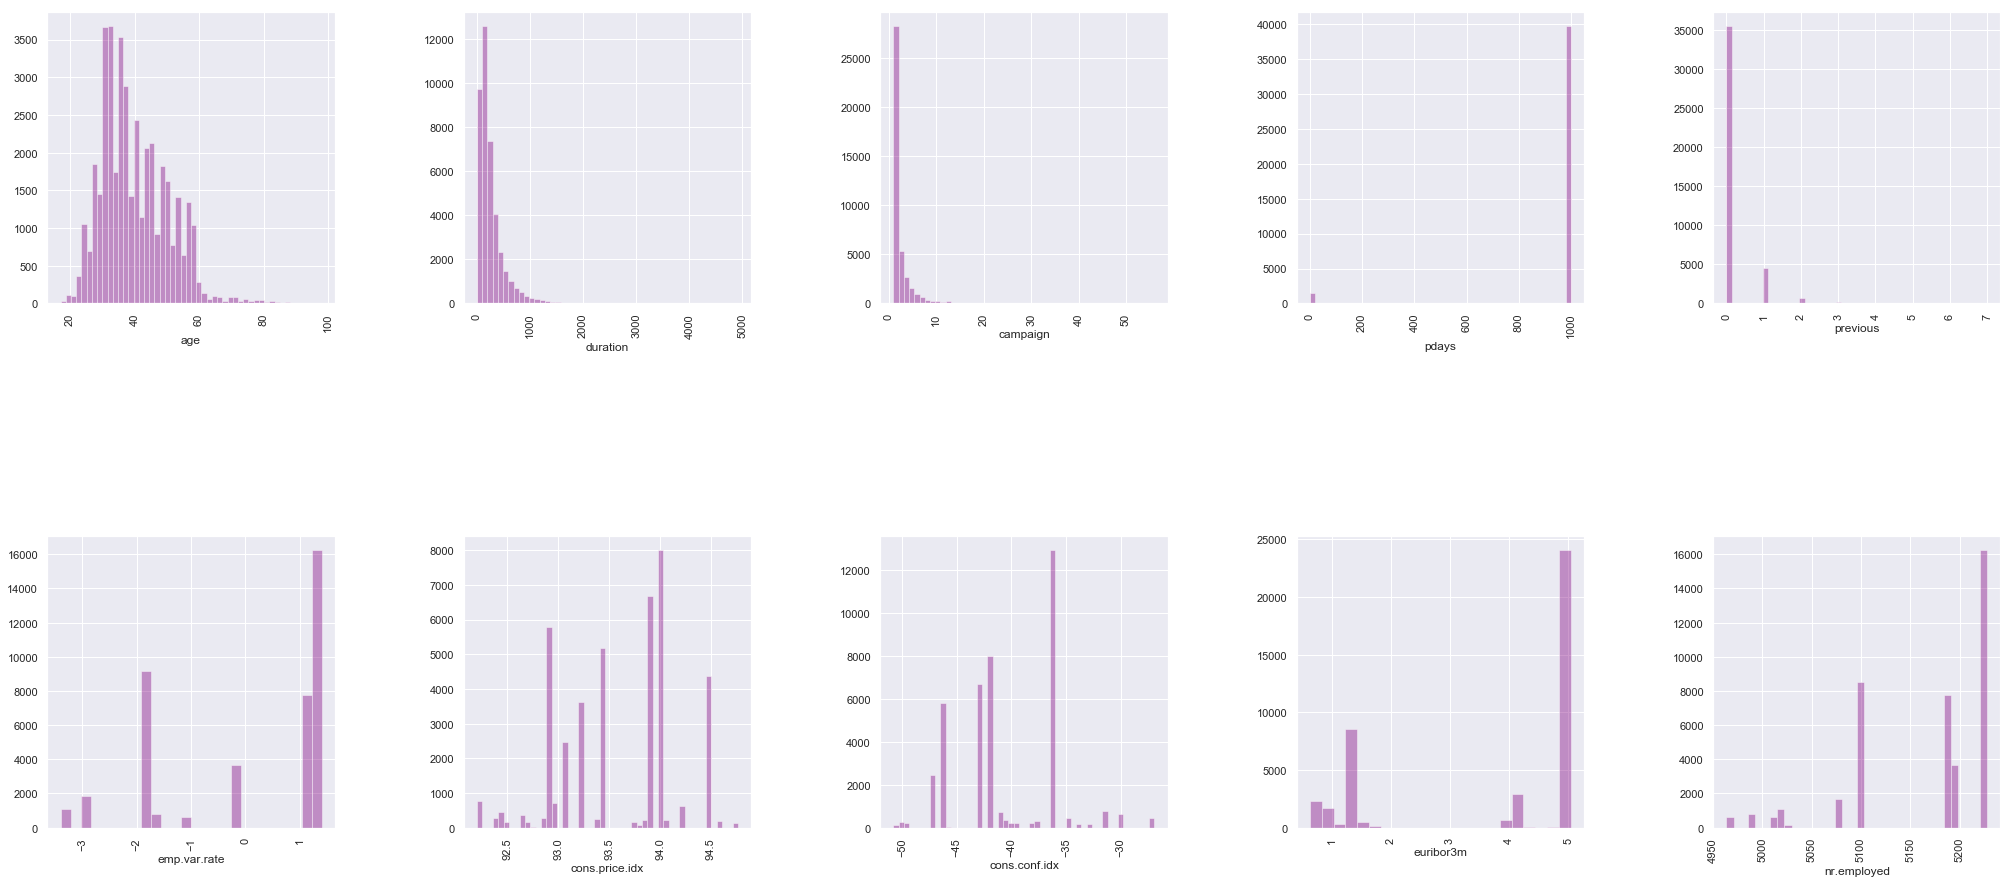

In [23]:
# Visualize all numerical variables
sns.set(style="darkgrid")
fig, ax = plt.subplots(2, 5, figsize=(35, 15))
for variable, subplot in zip(numeric_vars, ax.flatten()):
    sns.distplot(X[variable], ax=subplot, kde=False, hist=True,color='purple')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.subplots_adjust(wspace=0.45, hspace=0.8)

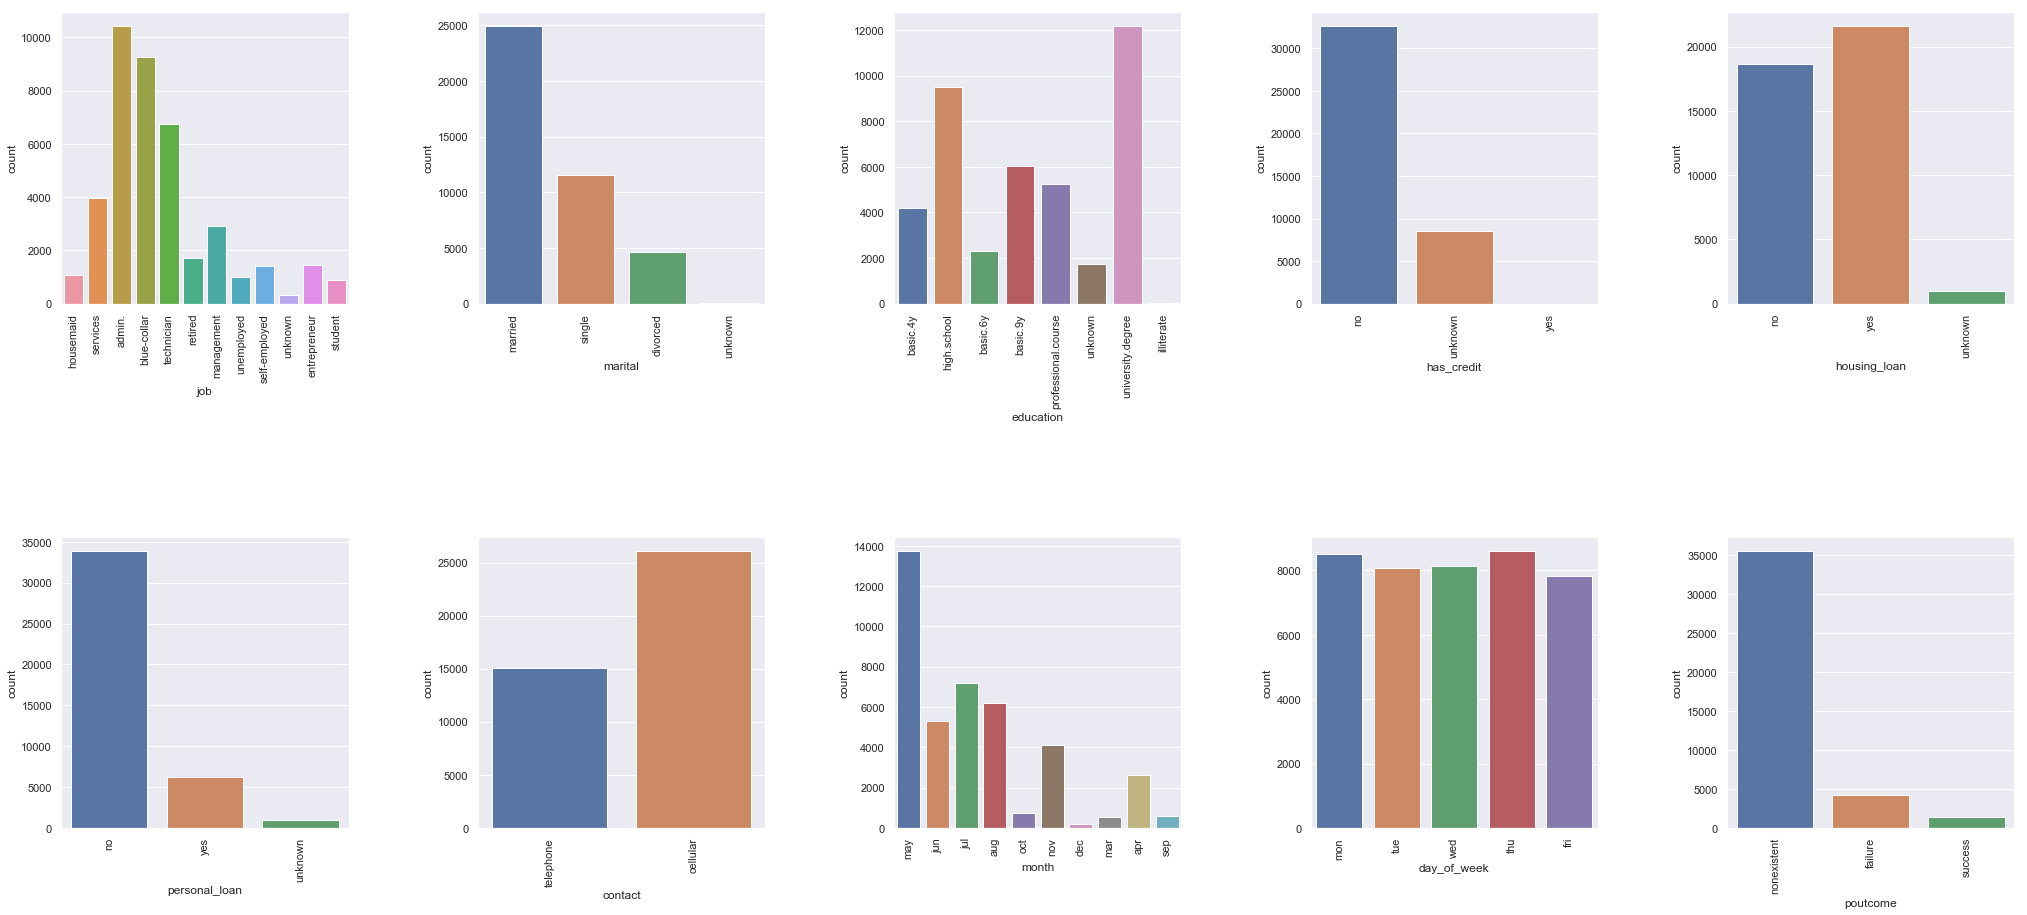

In [24]:
# Visualize all categorical variables
sns.set(style="darkgrid")
fig, ax = plt.subplots(2, 5, figsize=(35, 15))
for variable, subplot in zip(categorical_vars, ax.flatten()):
    sns.countplot(X[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.subplots_adjust(wspace=0.45, hspace=0.8)


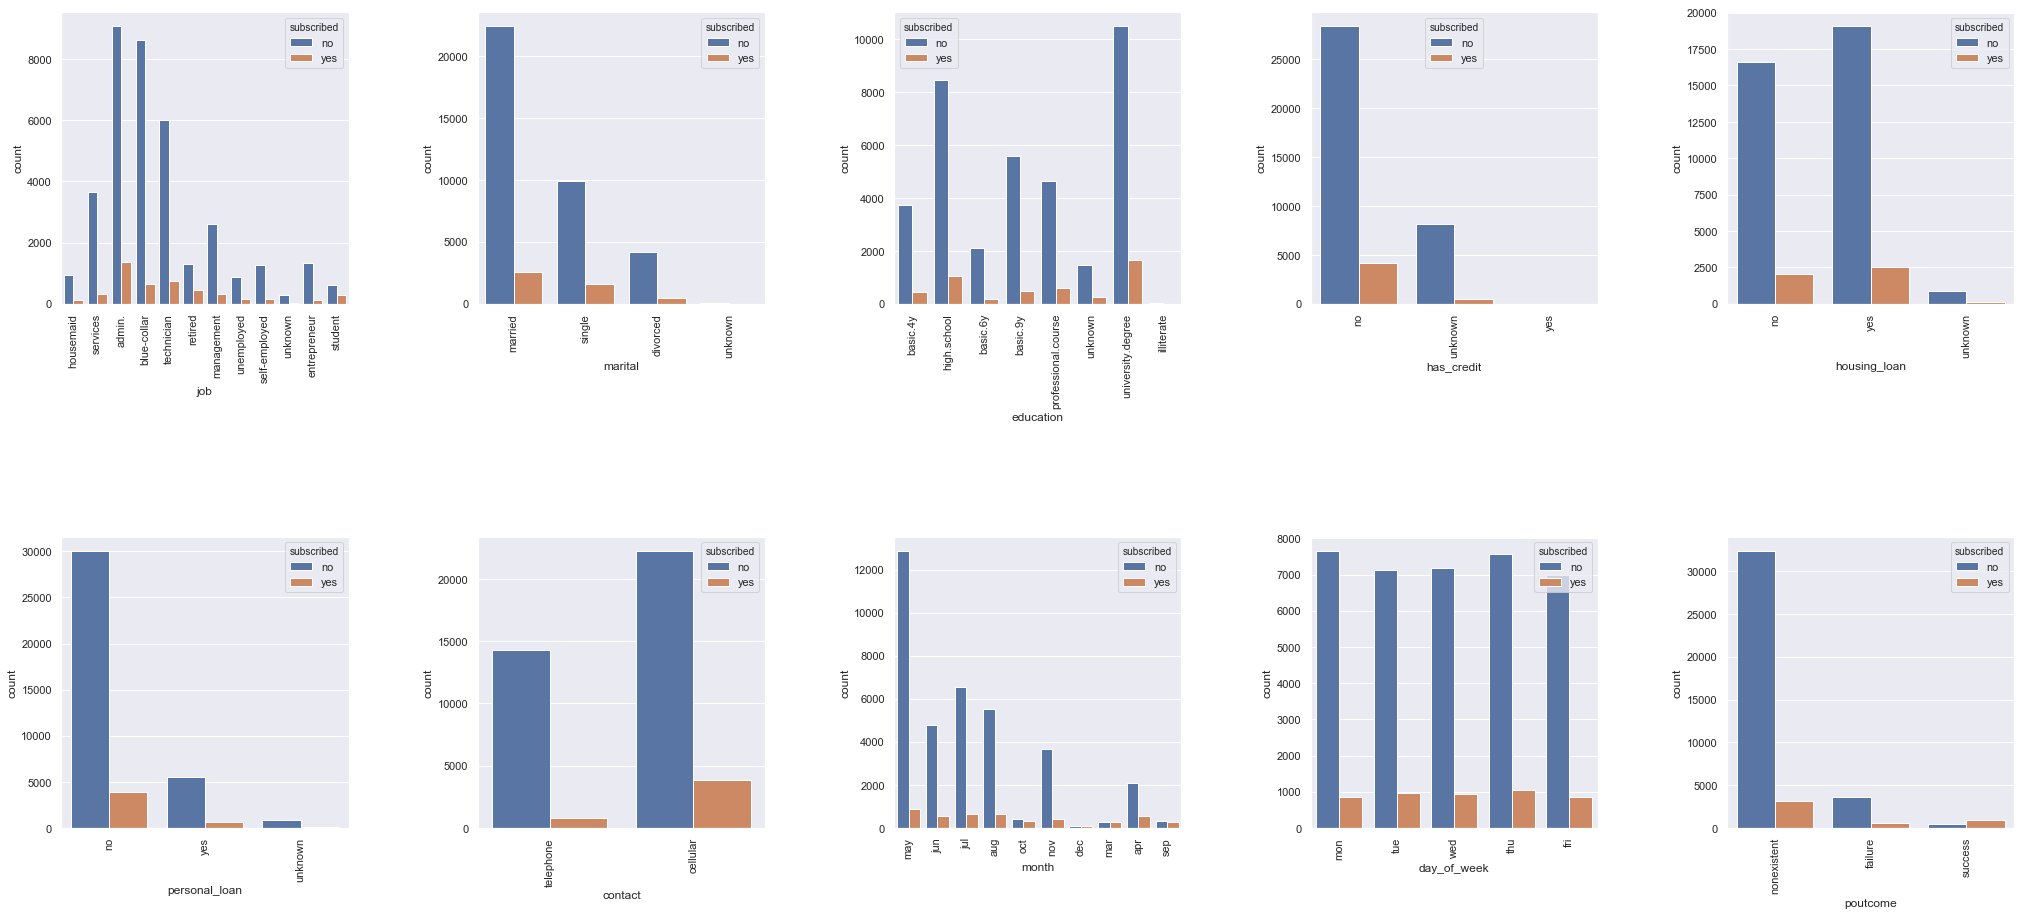

In [25]:
fig, ax = plt.subplots(2, 5, figsize=(35, 15))
for variable, subplot in zip(categorical_vars, ax.flatten()):
    sns.countplot(x=variable,hue='subscribed',data=clean_bank_data,ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.subplots_adjust(wspace=0.45, hspace=0.8)

In [26]:
# Visualize all numeric variables
#sns.pairplot(clean_bank_data, hue='subscribed')
X.head()

,age,job,marital,education,has_credit,housing_loan,personal_loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


### 6. Machine Learning: Classification

<img src='https://cdn-images-1.medium.com/max/1600/0*NbQlrmQFOsjPFB-f.gif' width='500'>

In [27]:
# import LabelEncoder and instantiate object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# apply LabelEncoder object on categorical columns
X = X.apply(le.fit_transform)
X.head(10)

,age,job,marital,education,has_credit,housing_loan,personal_loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,8,18,16,287,8
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,8,18,16,287,8
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,8,18,16,287,8
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,8,18,16,287,8
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,8,18,16,287,8
5,28,7,1,2,1,0,0,1,6,1,198,0,26,0,1,8,18,16,287,8
6,42,0,1,5,0,0,0,1,6,1,139,0,26,0,1,8,18,16,287,8
7,24,1,1,7,1,0,0,1,6,1,217,0,26,0,1,8,18,16,287,8
8,7,9,2,5,0,2,0,1,6,1,380,0,26,0,1,8,18,16,287,8
9,8,7,2,3,0,2,0,1,6,1,50,0,26,0,1,8,18,16,287,8


In [28]:
#import OneHotEncoder and instantiate object
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(X)
X = ohe.transform(X).toarray()
X.shape

/Users/bravali/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(41176, 2141)

In [29]:
X

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
y, unique = pd.factorize(y)
y

array([0, 0, 0, ..., 0, 1, 0])

In [31]:
 #onehotlabels1 = pd.get_dummies(X)
 #onehotlabels1.shape

In [32]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
print('Training Features Shape:', X_train.shape)
print('Training test Shape:', X_test.shape)
print('Testing Features Shape:', y_train.shape)
print('Testing test Shape:', y_test.shape)

Training Features Shape: (28823, 2141)
Training test Shape: (12353, 2141)
Testing Features Shape: (28823,)
Testing test Shape: (12353,)


In [35]:
# from sklearn.linear_model import LogisticRegression
# #from sklearn.naive_bayes import GaussiaNB
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier


# models = [
#     ('LR',LogisticRegression()),
#     ('NB',GaussianNB()),
#     ('SVM', SVC()),
#     ('KNN',KNeighborsClassifier()),
#     ('DT',DecisionTreeClassifier()),
#     ('RF',RandomForestClassifier())
#     ]

# for name, model in models:
#     clf = model
#     clf.fit(X_train,y_train)
#     accuracy = clf.score(X_test,y_test)
#     print(name,': ',accuracy)

In [51]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 50 decision trees
rf = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train);

# Use the forest's predict method on the test data
y_predict = rf.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

# Calculate the absolute errors
errors = abs(y_predict - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

#acc_random_forest = round(rf.score(X_train, y_train) * 100, 2)
#print(round(acc_random_forest,2,), "%")

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_predict))

print("Classification Report:")
print(classification_report(y_test, y_predict))

Accuracy: 0.9038290293855743
Mean Absolute Error: 0.1 degrees.
Confusion Matrix:
[[10790   235]
 [  953   375]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11025
           1       0.61      0.28      0.39      1328

   micro avg       0.90      0.90      0.90     12353
   macro avg       0.77      0.63      0.67     12353
weighted avg       0.89      0.90      0.89     12353



### Cross Validation (K-fold)

In [38]:
from sklearn.model_selection import KFold, cross_val_score
K_fold = KFold (n_splits=10, shuffle=True,random_state=0)

### kNN

In [53]:
clf = RandomForestClassifier(n_estimators = 10)
score = cross_val_score(clf,X_test,y_test,cv=5,n_jobs=1,scoring='accuracy')
score

array([0.90004047, 0.90044516, 0.89963577, 0.89959514, 0.90323887])

In [54]:
round(np.mean(score)*100,2)

90.06

In [38]:
#from pprint import pprint
## Look at parameters used by our current forest
#print('Parameters currently in use:\n')
#pprint(rf.get_params())

In [39]:
#from sklearn.model_selection import RandomizedSearchCV
## Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 20, stop = 500, num = 10)]
## Number of features to consider at every split
#max_features = ['auto', 'sqrt']
## Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
## Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
## Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
## Method of selecting samples for training each tree
#bootstrap = [True, False]
## Create the random grid
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}
#pprint(random_grid)
#

In [40]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import RandomizedSearchCV
## Use the random grid to search for best hyperparameters
## First create the base model to tune
#rf1 = RandomForestClassifier()
## Random search of parameters, using 3 fold cross validation, 
## search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
## Fit the random search model
#rf_random.fit(X_train, y_train)

In [41]:
#rf_random.best_params_

In [42]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 150, 180, 200]
# }
# # Create a based model
# rf1 = RandomForestRegressor()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf1, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)

In [43]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.7min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

In [46]:
# best_grid = grid_search.best_estimator_
# print(best_grid)
# grid_accuracy = accuracy_score(y_test, y_predict)
# print(grid_accuracy)
# print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - accuracy) / accuracy))
# 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=12, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
0.9038290293855743
Improvement of 0.00%.


In [ ]:
for name, importance in zip(X, rf.feature_importances_):
    print(name, "=", importance)


### 8. Conclusion & Recommendations

<img src='https://www.usefultechtips.com/wp-content/uploads/2018/01/how-to-improve-website-speed.jpg' width='600'>